In [14]:
import os
import pickle

naive_results = {}
ltrwe_results = {}
sss_results = {}
baseline_results = {}

clean_sample_sizes = [1, 3, 10, 30, 100, 300, 1000]
for (idx, clean_sample_size) in zip(range(0, len(clean_sample_sizes)), clean_sample_sizes):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.update({clean_sample_size: pickle.load(F)})
for (idx, clean_sample_size) in zip(range(len(clean_sample_sizes), 2*len(clean_sample_sizes)), clean_sample_sizes):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.update({clean_sample_size: pickle.load(F)})
for (idx, clean_sample_size) in zip(range(2*len(clean_sample_sizes), 3*len(clean_sample_sizes)), clean_sample_sizes):
    with open(os.path.join('.', 'results_{}.pickle'.format(idx)), 'rb') as F:
        sss_results.update({clean_sample_size: pickle.load(F)})
for (idx, clean_sample_size) in zip(range(0, len(clean_sample_sizes)), clean_sample_sizes):
    with open(os.path.join('..', 'fmnist_sweep_clean_dataset_size_clean', 'results_{}.pickle'.format(idx)), 'rb') as F:
        baseline_results.update({clean_sample_size: pickle.load(F)})

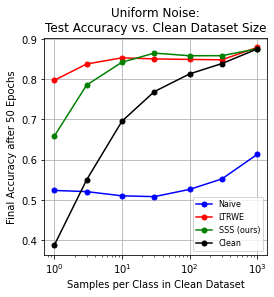

In [23]:
import numpy as np
from matplotlib import pyplot as plt

def get_error_vs_clean_sample_size_sweep(results_dict):
    x = np.array(clean_sample_sizes)
    y = []
    for clean_sample_size in clean_sample_sizes:
        results = results_dict[clean_sample_size]
        yy = results['test_accuracy']['values']
        y.append(yy[-1])
    y = np.array(y)
    return x, y

(fig, ax) = plt.subplots(1, 1, figsize=(4, 4))

x, y = get_error_vs_clean_sample_size_sweep(naive_results)
ax.plot(x, y, marker='.', linestyle='-', markersize=10, color='blue', label='Naive')

x, y = get_error_vs_clean_sample_size_sweep(ltrwe_results)
ax.plot(x, y, marker='.', linestyle='-', markersize=10, color='red', label='LTRWE')

x, y = get_error_vs_clean_sample_size_sweep(sss_results)
ax.plot(x, y, marker='.', linestyle='-', markersize=10, color='green', label='SSS (ours)')

x, y = get_error_vs_clean_sample_size_sweep(baseline_results)
ax.plot(x, y, marker='.', linestyle='-', markersize=10, color='black', label='Clean')

ax.legend(prop={'size': 8})
ax.set_xscale('log')
ax.set_xlabel('Samples per Class in Clean Dataset')
ax.set_ylabel('Final Accuracy after 50 Epochs')
ax.set_title('Uniform Noise:\nTest Accuracy vs. Clean Dataset Size')
ax.grid(True)
fig.savefig(os.path.join('..', '..', 'figures', 'uniform_clean_dataset_size_sweep.pdf'))